<h2>DataSet: <a href="https://data.wprdc.org/dataset/arrest-data">Pittsburgh Police Arrest Data</a></h2>

This notebook focuses on the areas where people have been taken into custody. One submetric of being the best neighborhood in Pittsburgh would be safety. This notebook would evaluate the safety of certain neighborhoods in Pittsburgh to a particular degree.

These are the necessary libraries for this notebook:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import seaborn as sb

In [2]:
# load csv file with index column as a date
data = pd.read_csv("Datasets/Arrests.csv",
                           index_col="ARRESTTIME", 
                           parse_dates=True)

Lets take a look at the information contained in this data

In [3]:
data.head(5)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
ARRESTTIME,,,,,,,,,,,,,,,,
2016-08-24 12:20:00,1,1975272,16158872,42.0,F,B,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
2016-08-03 14:55:00,2,1974456,16144120,31.0,M,W,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2016-08-03 16:45:00,3,1974466,16144165,63.0,F,B,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
2016-08-05 02:36:00,4,1974550,16145257,25.0,F,W,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
2016-08-06 02:00:00,5,1974596,16145962,25.0,M,B,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


Lets take a look at the arrest made each year

In [4]:
data.resample("Y").size()

ARRESTTIME
2015-12-31       17
2016-12-31     4146
2017-12-31    12179
2018-12-31    10899
2019-12-31    10731
2020-12-31     7938
2021-12-31     7430
2022-12-31     6729
2023-12-31     6371
Freq: A-DEC, dtype: int64

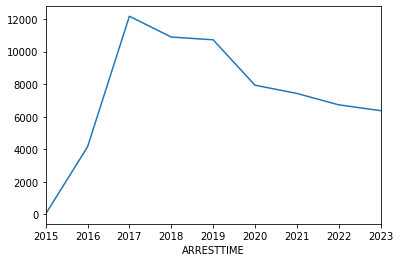

In [5]:
data['_id'].resample("Y").count().plot()

Hmm looks like 2015's arrest data may be incomplete. Overall, there seems to be a general decline of arrests according to the data set. 

Time to explore which neighborhood in Pitt contains the most arrest. Lets begin by loading the map

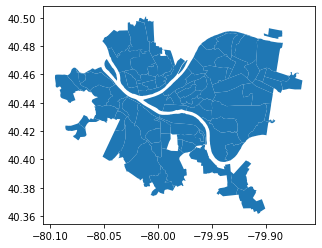

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

Taking a peek at the top 10 neighborhoods with the most arrest

In [7]:
num_arrest = data['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=False).rename_axis('neighborhood').reset_index(name='Number of Arrests')
num_arrest.head(10)

,neighborhood,Number of Arrests
0,Central Business District,4438
1,South Side Flats,3495
2,Carrick,2349
3,East Allegheny,2217
4,Homewood South,2089
5,Homewood North,1969
6,East Liberty,1887
7,Marshall-Shadeland,1516
8,Bluff,1501
9,Mount Washington,1433


Time to merge the arrest data with the map of Pittsburgh

In [8]:
arrest_map = neighborhoods.merge(num_arrest, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
arrest_map[['hood','Number of Arrests','geometry']].head()

,hood,Number of Arrests,geometry
0,Point Breeze North,289.0,"POLYGON ((-79.90531 40.45549, -79.90488 40.455..."
1,Squirrel Hill North,290.0,"POLYGON ((-79.92063 40.44423, -79.92052 40.443..."
2,Garfield,722.0,"POLYGON ((-79.93546 40.47257, -79.93530 40.472..."
3,Bedford Dwellings,665.0,"POLYGON ((-79.96601 40.45520, -79.96595 40.454..."
4,Knoxville,1336.0,"POLYGON ((-79.98819 40.41852, -79.98824 40.418..."


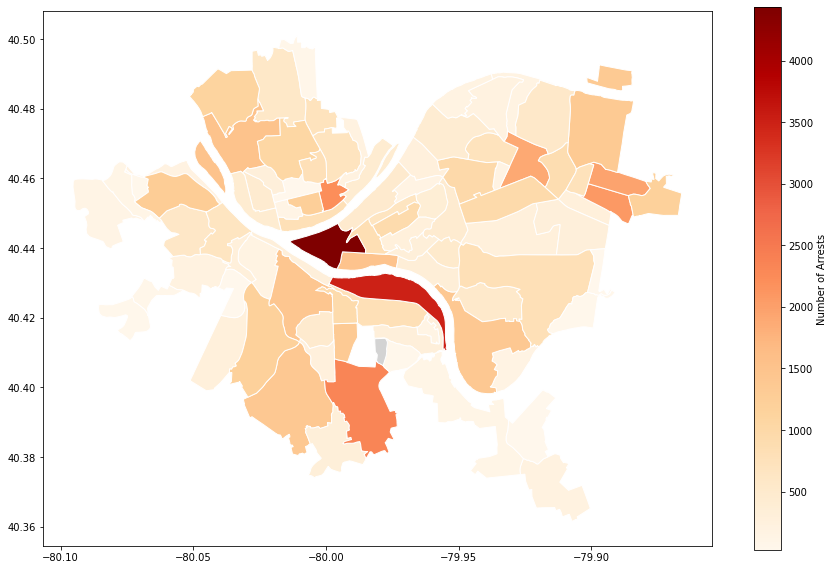

In [9]:
arrest_map.plot(column='Number of Arrests', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Arrests"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

With the map completed, it is time to see exactly which neighborhoods are the safest through a bar graph.

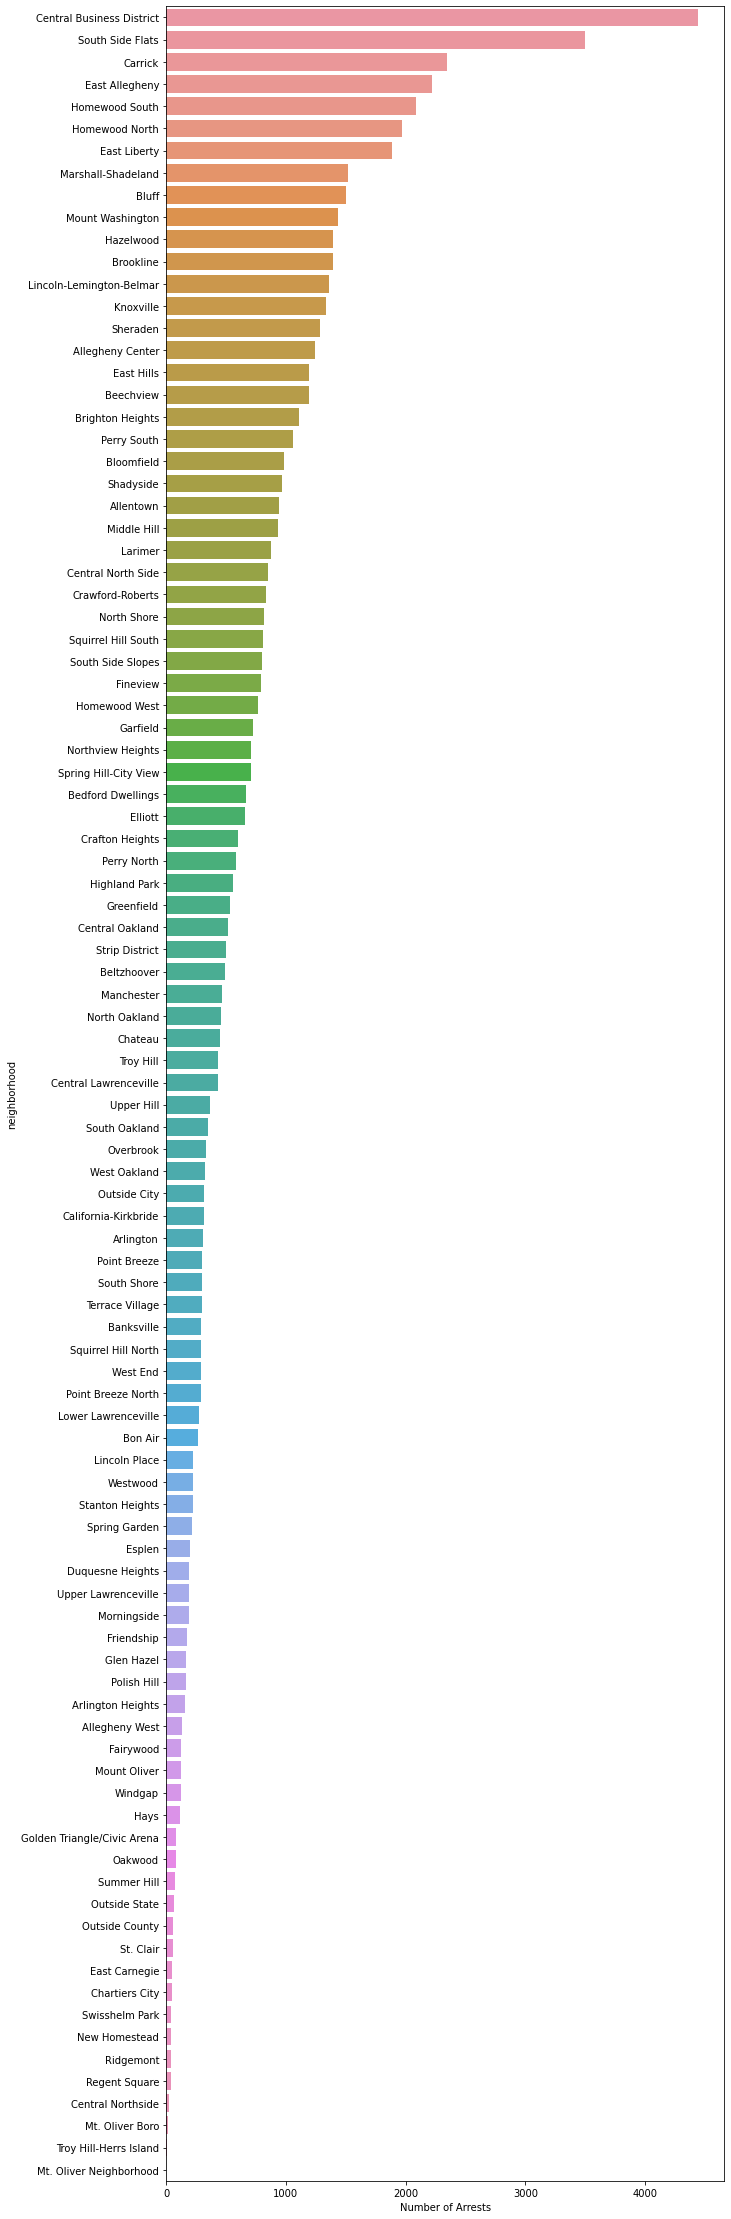

In [10]:
fig_dims = (10, 40)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sb.barplot(x="Number of Arrests", # x axis label
                 y="neighborhood", # y axis label
                 ax=ax, # figsizes
                 data=num_arrest, # data we want to show
                 orient="h", # orientation of the graph
                 order=num_arrest.sort_values("Number of Arrests", ascending = False).neighborhood)

In [11]:
# Get the 5 neighborhoods with the least number of arrests
num_arrest.tail(5)

,neighborhood,Number of Arrests
93,Regent Square,37
94,Central Northside,23
95,Mt. Oliver Boro,18
96,Troy Hill-Herrs Island,6
97,Mt. Oliver Neighborhood,2


#### Conclusion
Based on the result presented in this notebook, **Mt. Oliver Neighborhood**, **Troy Hill-Herrs Island**, and **Mt. Oliver Boro** are the *top three* safest neighborhoods. While the arrest data articulates the safety of each neighborhood, the information should be taken with a grain of salt. The crime's severity was not measured in this notebook. Thus, the weight of each arrest may differ if severity is involved. Additionally, there could be unaccounted crimes in various neighborhoods. The data used in this notebook may not contain all crimes that have occurred in Pittsburgh. Finally, the data contains arrest that span a 9 year range. Thus, the number of arrests may not represent the how safe a neighborhood is in present day.